In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import xgboost as xgb

DATA IMPORT AND MANIPULATION

In [2]:
data = pd.read_csv('Data/mushrooms.csv')
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [3]:
# Mapping information from the text file (used ChatGPT to get the map)
attribute_mapping = {
    "class": {"e": "edible", "p": "poisonous"},
    "cap-shape": {"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"},
    "cap-surface": {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
    "cap-color": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "bruises": {"t": "bruises", "f": "no"},
    "odor": {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", "n": "none", "p": "pungent", "s": "spicy"},
    "gill-attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
    "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"},
    "stalk-surface-above-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-surface-below-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-color-above-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "stalk-color-below-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": "none", "o": "one", "t": "two"},
    "ring-type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"},
    "spore-print-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
    "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"},
    "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"}
}

In [4]:
df = pd.DataFrame()

for column in data.columns:
    if column in attribute_mapping:
        df[column] = data[column].map(attribute_mapping[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [5]:
df.isna().sum()
# no Nan in the data

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.nunique()
# veil-type is useless so we remove it 
# we also remove stalk-root because, from the doc, we know it has missing values (registered as '?')

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
df = df.drop(['veil-type', 'stalk-root'], axis=1)

EXPLORATORY ANALYSIS

In [8]:
# since we have categorical data, we cannot compute the correlation index
# we use the Cramér's V statistic instead, which is a measure of association between two categorical variables

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    
    # Avoid division by zero
    if n == 0:
        return np.nan
    
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    # Avoid division by zero
    if (n-1) == 0 or (k-1) == 0 or (r-1) == 0:
        return np.nan
    
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    # Avoid division by zero
    if min((kcorr-1), (rcorr-1)) == 0:
        return np.nan
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [9]:
# Calculate Cramér's V for each pair of categorical variables
columns = df.select_dtypes(include='object').columns
cramer_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

Text(0.5, 1.0, "Cramér's V Correlogram")

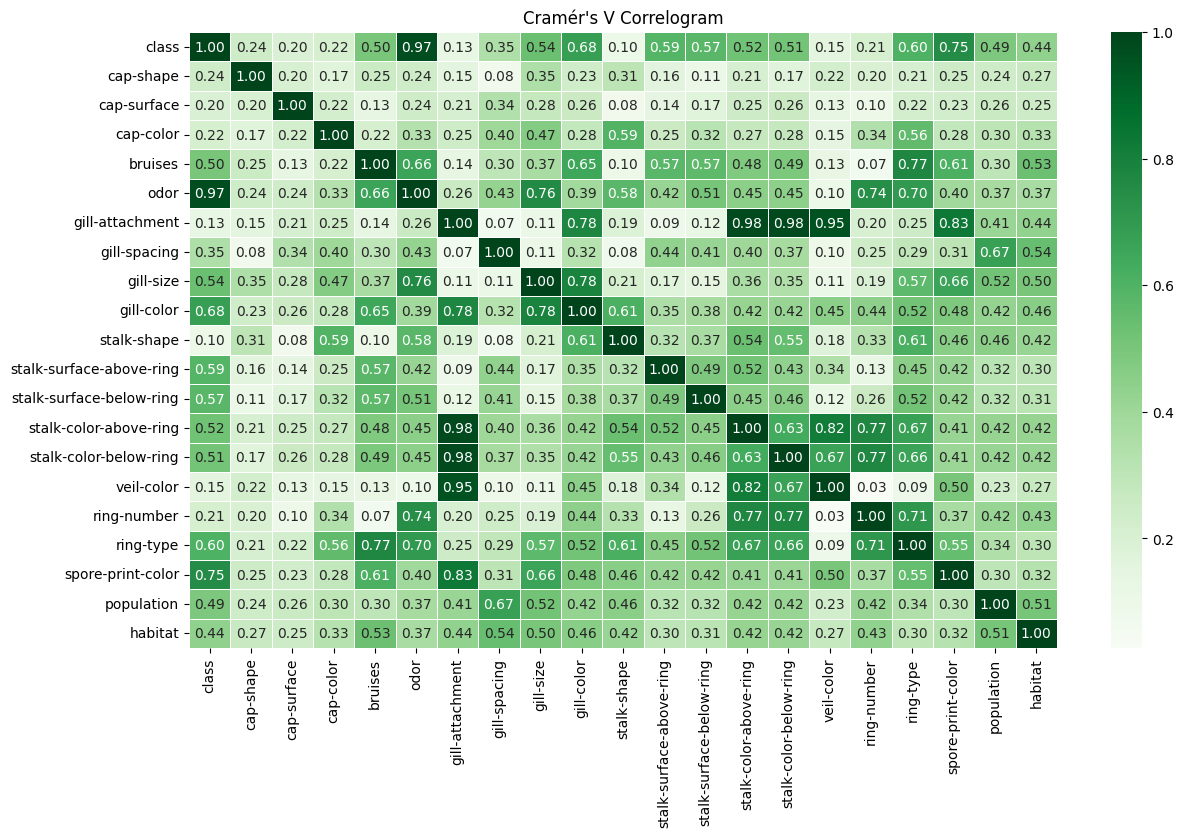

In [10]:
plt.figure(figsize=(14, 8))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)

plt.title("Cramér's V Correlogram")

<Axes: xlabel='odor', ylabel='count'>

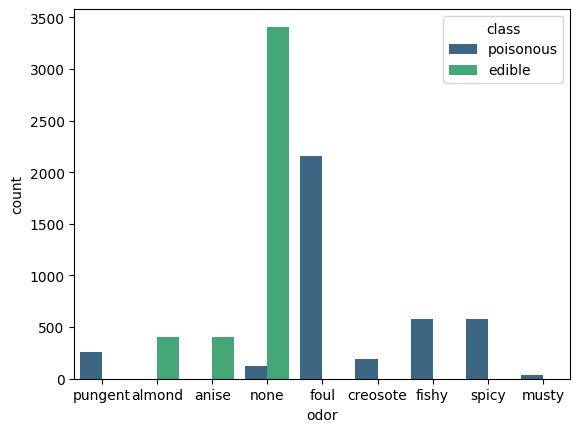

In [11]:
sns.countplot(x='odor', hue='class', data=df, palette='viridis')
# odor is highly correlated with the label so we remove it, otherwise the task would be too easy

In [12]:
df = df.drop('odor', axis=1)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,free,close,narrow,black,enlarging,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,free,close,broad,black,enlarging,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,free,close,broad,brown,enlarging,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,free,close,narrow,brown,enlarging,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,free,crowded,broad,black,tapering,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


CLASSIFICATION

In [13]:
# now data must be transformed to numerical, we use one-hot encoding
dummy_cols = [col for col in df.columns if col != 'class']
dummies = pd.get_dummies(df[dummy_cols])

# we also transform the label 
value_mapping = {'value1': 1, 'value2': 0}
lab = df['class'].map({'poisonous': 1, 'edible': 0})

df_num = pd.concat([lab, dummies], axis=1)
df_num.head()

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
random_state = 35

In [47]:
# we split the data in training and test set
X = df_num.drop('class', axis=1)
y = df_num['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [48]:
rfc = RandomForestClassifier(random_state=random_state)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=35)

In [49]:
pred = rfc.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [51]:
# now we use k-fold cross validation instead of the less robust train-test approach
nfold = 5

In [52]:
rfc_cv = RandomForestClassifier(random_state=random_state)

In [53]:
cv_scores = cross_val_score(rfc_cv, X, y, cv=nfold, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

mean_accuracy = cv_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Cross-Validation Scores: [0.84246154 1.         1.         1.         0.69273399]
Mean Accuracy: 0.91


In [54]:
# and now we use xgboost instead of the random forest
xgbc = xgb.XGBClassifier(n_estimators=100, random_state=random_state)

In [55]:
cv_scores_xgb = cross_val_score(xgbc, X, y, cv=nfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores_xgb)

# Calculate and print the mean accuracy
mean_accuracy_xgb = cv_scores_xgb.mean()
print(f"Mean Accuracy: {mean_accuracy_xgb:.2f}")

Cross-Validation Scores: [0.84246154 1.         1.         1.         0.87192118]
Mean Accuracy: 0.94
